# Predictiong Heart Disease with the help of Machine Learning

This is a ML approach to predict whether a person has heart disease or not by taking thier report as an input

We will use the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentaion

## 1. Problem Definition

In a statement-
> Givrn the clinical parametrs of the patient, can we predict whether or not a patient has heart disease or not ?

## 2. Data

The original data came from the Cleveland data from UCI ML repository.

This is also available on Kaggle

## 3. Evaluation 

> If we reach 95% accuaracy in prediction of heart disease, we can pursue this model.

## 4. Features

Information about data

**Data Dictionary**

* age (Age in years)
* sex : (1 = male, 0 = female)
* cp (Chest Pain Type): [0: asymptomatic,1: atypical angina,2: non-anginal pain,3: typical angina]
* trestbps (Resting Blood Pressure in mm/hg )
* chol (Serum Cholesterol in mg/dl)
* fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
* restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]
* thalach (maximum heart rate achieved)
* exang (Exercise Induced Angina): [1 = yes, 0 = no]
* oldpeak (ST depression induced by exercise relative to rest)
* slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]
* ca [number of major vessels (0–3)
* thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
* target: [0 = disease, 1 = no disease]

## Preparing tool

we will import pandas, numpy and matplotlib

In [1]:
# Import all the tools we need

# Regular EDA (Eploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want figures to be appear notebook 
%matplotlib inline

# Models from scikitlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import RocCurveDisplay, roc_curve

## LOAD DATA

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration

The goal here is to get mroe and more familiar with the data and become subject master on the dataset we are working on
1. What question(s) are we trying to solve?
2. Hwat kind of data do we have and how do we treat diff types ?
3. What's missing from the data and how do we deal from it ?
4. Where are outliers and why do we care about them ?
5. How can we add, remove or change features to get more out of your data ?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Lets see if we have equal or similar amount of data
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

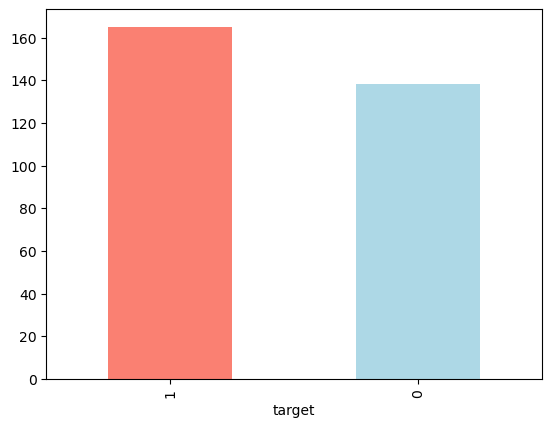

In [5]:
# visualization of the same
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


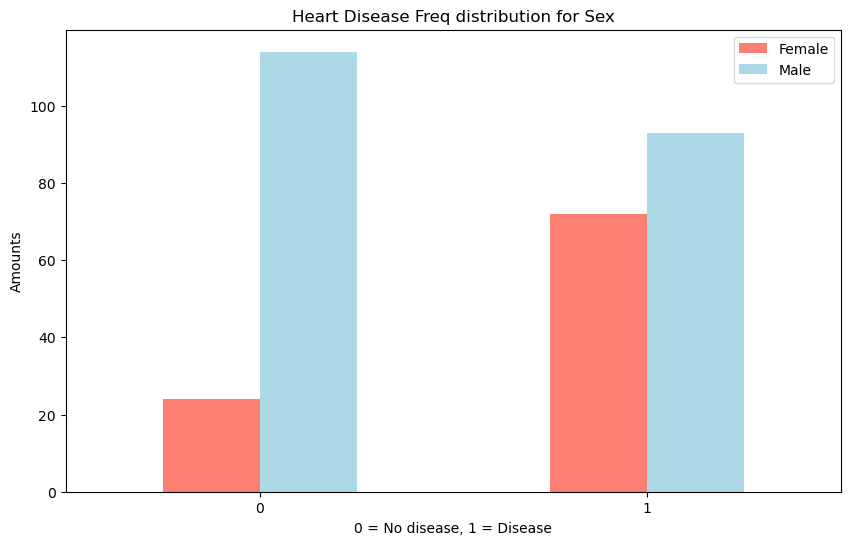

In [11]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                    color = ['salmon', 'lightblue'],
                                    figsize = (10,6))

plt.title('Heart Disease Freq distribution for Sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amounts')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0); # Used for xlabels orientation (0 and 1 in our case)

### Age Vs Max heart rate

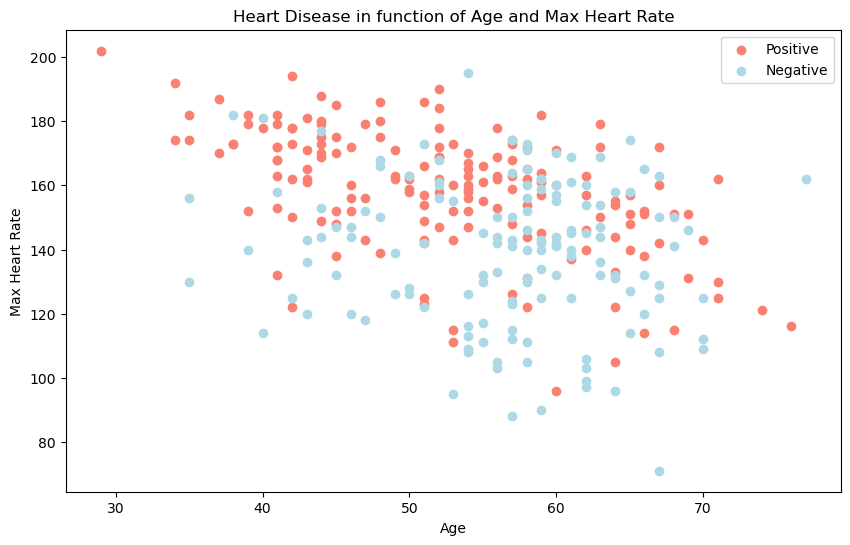

In [12]:
plt.figure(figsize = (10,6))

# Scatter is suitable 
# for positives
plt.scatter(df.age[df.target==1],
            df.thalach[df.target ==1],
            color = 'salmon')

# for negatives
plt.scatter(df.age[df.target==0],
            df.thalach[df.target ==0],
            color = 'lightblue')

# For info of graph
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Positive','Negative']);

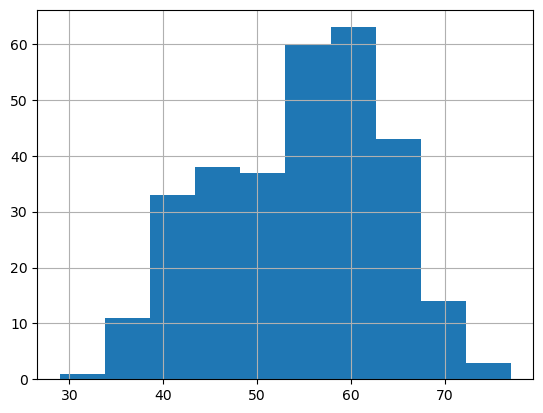

In [13]:
# Check distribution of age iwth hist
df.age.hist();

### Heart disease freq per chest pain type

cp (Chest Pain Type): [0: asymptomatic,1: atypical angina,2: non-anginal pain,3: typical angina]

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


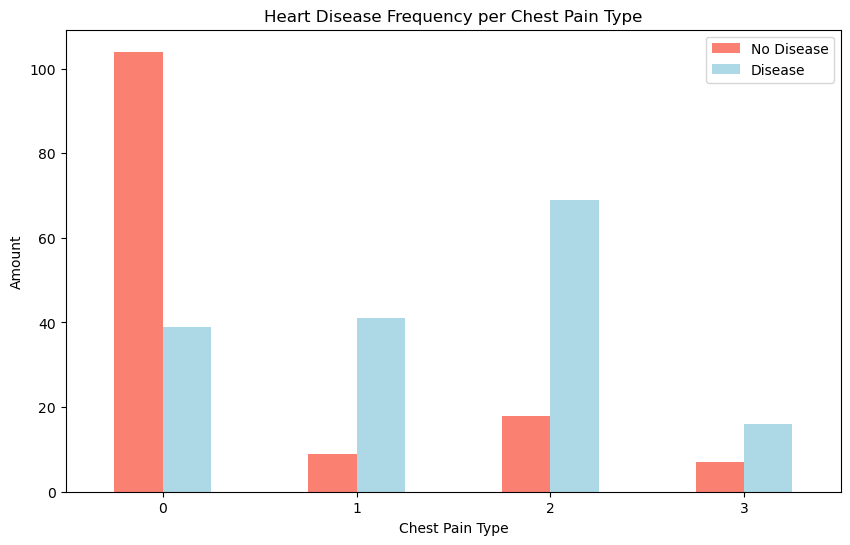

In [15]:
# make it visual
pd.crosstab(df.cp,df.target).plot(kind = 'bar',
                                 color = ['salmon','lightblue'],
                                 figsize = (10,6))

# Info about fig
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation = 0);

In [16]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


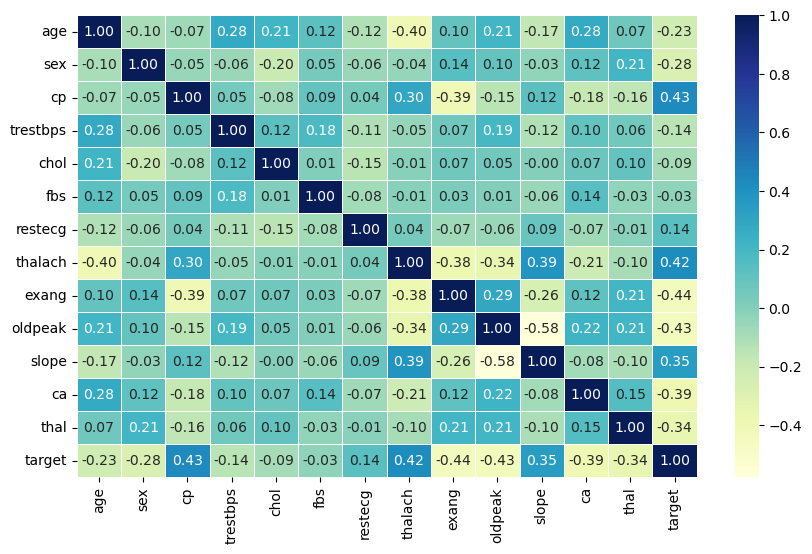

In [17]:
# make our correlation matrix Visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu')

Here the Positive values and Negatuve values indicates :
    
1. Positive Correlation - Positive values :
    If 1 feature's values increases then the over feature's values also increases.

2. Negative Correaltion - Negative values :
    If 1 feature's values increases then the over feature's values decreases.
    
Correaltion o< Correaltion value

## 5. Modelling

In [18]:
# Split data into x and y
x = df.drop('target', axis = 1)
y = df['target']

In [19]:
# Splitting data into train and test sets

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

We have our data splitted

Now we will train the model (find patterns) on train set

And test the model (Use patterns) on test set

We will use 3 models :
1. Logistic Regression
2. K-Nearest Neighbours Classifeir
3. Random Forest Classifier

In [20]:
# Make model dictionary
models = {'Logistic Regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Random Forest' : RandomForestClassifier()}

# Create a function to fit and score models :

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """"
    This function fits and evaluates the models
    models : dictionary of models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : trainign data (labels)
    y_test : testing data (labels)
    """
    # random seed
    np.random.seed(42)
    # Make score dictionary
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model
        model.fit(x_train, y_train)
        # Append the scores in dictionary 
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [21]:
# Get scores
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

C:\Users\01abh\Desktop\hd-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

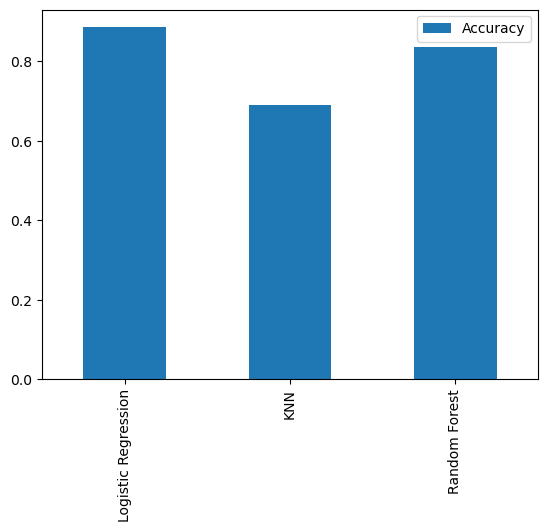

In [22]:
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])
model_compare.T.plot.bar();

We have the baseline models, its tiem for further steps

Lets do the following :
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precission
* Recall
* F1 Score
* Classification Matrix
* ROC curve
* Area Under the Curve (AUC)

## Hyperparameter Tuning (By Hand)

In [23]:
# Lets tuen KNN
train_scores = []
test_scores = []

neighbours = range(1,21)

# define model
knn = KNeighborsClassifier()

for i in neighbours:
    # Set the neighbours
    knn.set_params(n_neighbors = i)
    
    # fit the model
    knn.fit(x_train, y_train)
    
    # Update Train scores
    train_scores.append(knn.score(x_train, y_train))
    
    # Update Test scores
    test_scores.append(knn.score(x_test, y_test))

In [24]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max accuracy in test data : 75.41%


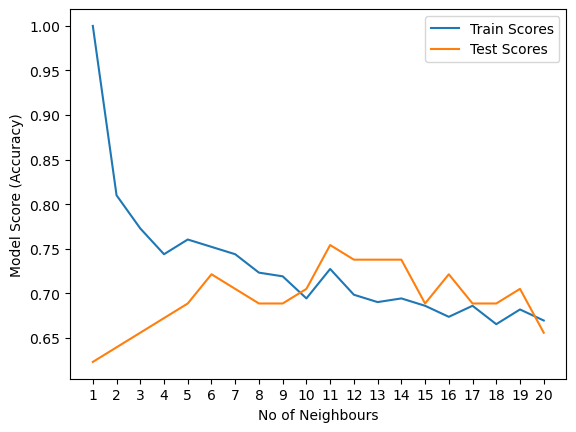

In [26]:
plt.plot(neighbours, train_scores, label = "Train Scores")
plt.plot(neighbours, test_scores, label = 'Test Scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel("No of Neighbours")
plt.ylabel("Model Score (Accuracy)")
plt.legend()

print(f"Max accuracy in test data : {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

We will tune:
* Logistic Regression()
* Random Forrest()

...using RSCV

In [27]:
# Create hyperparameter grid for LR
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver' : ['liblinear']}

# create hyperparameters for RFC
rf_grid = {'n_estimators' : np.arange(10,1000,50),
           'max_depth' : [None, 3,5,10],
           'min_samples_split' : np.arange(2,20,2),
           'min_samples_leaf' : np.arange(1,20,2)}

In [28]:
# Tune LR

np.random.seed(42)

# setup hp for LR
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit the models
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Do the same for Random Forest

In [31]:
# Tune RF

np.random.seed(42)

# Setup hp for RF
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit the models
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [33]:
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyperparamerter tuning using GridSearchCV

Logistic Regression provides best output so far, so we will use GridSearchCV for further tunning

In [34]:
# make grid space for our hyperparmeters 
log_reg_grid = { "C" : np.logspace(-4,4,30),
                 "solver" : ["liblinear"]}

# setup for GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          verbose = True,
                          cv = 5)

# Fit the models
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [35]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
# Evaluate GridSearch
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluation

* ROC and AUC curve
* Confusion matrix 
* Classification report
* Precision
* Recall
* F1 Score

and better if cross-validation i used

In [37]:
# Make predicions
y_preds = gs_log_reg.predict(x_test)

In [38]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [40]:
# Plot ROC curve

# Get probs
y_probs = gs_log_reg.predict_proba(x_test)

# Get positive probs
y_probs_positive = y_probs[:, 1]

# Get fpr, tpr, threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

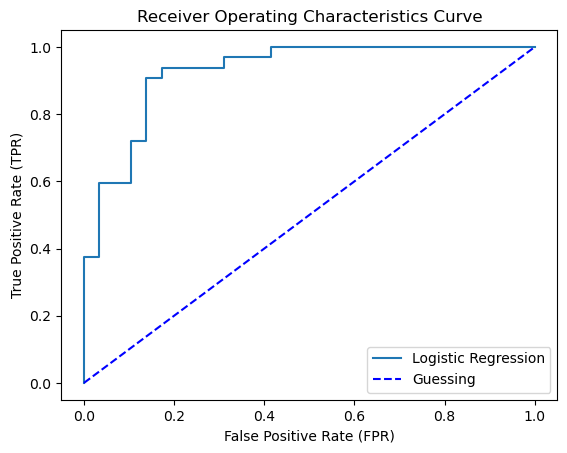

In [41]:
# Using RocCurveDisplay
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=None, estimator_name='Logistic Regression')

# Plotting the ROC curve
display.plot()
plt.plot([0,1], [0,1], color='blue', linestyle='--', label='Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristics Curve')
plt.legend()
plt.show()

In [42]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


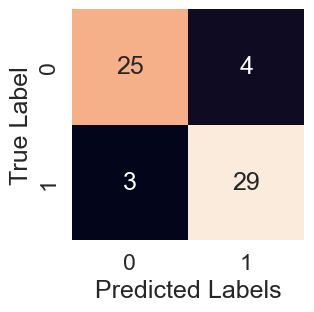

In [43]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """"
    Ploting Heatmap for confusion matrix
    """
    fig, ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

In [44]:
# Classifiction report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculation using Cross validation

In [45]:
# get best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
# new classifer with best params
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [47]:
# Cross validated Accuracy
cv_acc =  cross_val_score(clf,
                          x,
                          y,
                          cv = 5,
                          scoring = "accuracy")
cv_acc.mean()

0.8446994535519124

In [48]:
# Cross validated Precision
cv_pre =  cross_val_score(clf,
                          x,
                          y,
                          cv = 5,
                          scoring = "precision")
cv_pre.mean()

0.8207936507936507

In [49]:
# Cross validated Recall
cv_rec =  cross_val_score(clf,
                          x,
                          y,
                          cv = 5,
                          scoring = "recall")
cv_rec.mean()

0.9212121212121213

In [50]:
# Cross validated F1 Score
cv_f1 =  cross_val_score(clf,
                          x,
                          y,
                          cv = 5,
                          scoring = "f1")
cv_f1.mean()

0.8673007976269721

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1')])

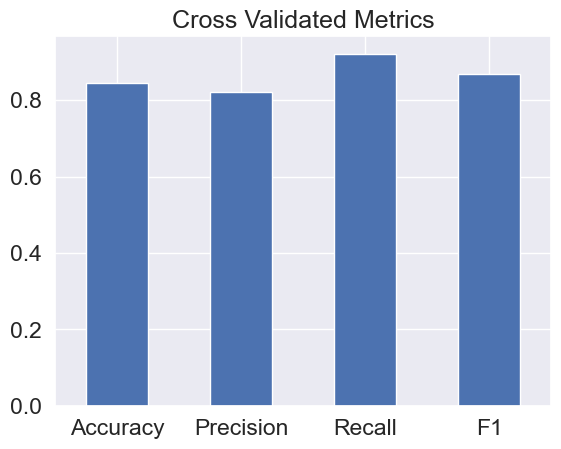

In [52]:
# Vizualize metrics
cv_metrics = pd.DataFrame({'Accuracy' : cv_acc.mean(),
                           'Precision' : cv_pre.mean(),
                           'Recall' : cv_rec.mean(),
                           'F1': cv_f1.mean()},
                           index = [0])

cv_metrics.T.plot(kind = 'bar',title = "Cross Validated Metrics",
                  legend = False)
plt.xticks(rotation = 0)

## Feature Importance

This helps us to udnerstand which feature influences the target variable more than other features.

Different methods for each and every model.

Here we will find feature importance for LogisticRegression model

In [53]:
# trained with best params
clf

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [57]:
# get best params
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

clf.fit(x_train, y_train);

In [58]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [63]:
# Match coef's of features to the columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

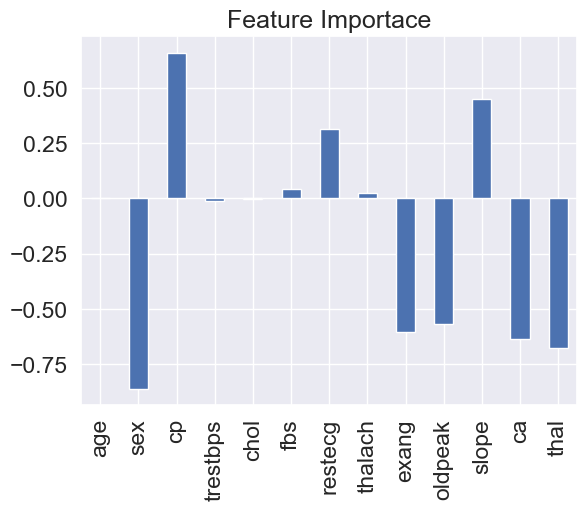

In [65]:
# Vizualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importace", legend = False);

In [66]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [67]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

After evaluation if it doesn't hit evaluation metric, we need to the answer the following questions -

* Can we collect more data ?
* Can we try a better model ? like CatBoost or XGBoost ?
* Can we improve the current models ? (apart from what we have done so far)


If our model is good enough, we can save and share it with others